![imagen.png](attachment:imagen.png)

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# # Subir a repositorio de Github, con al menos un pull request, y devolver el link

# Hacer un fork de este repositorio y trabajar sobre ese archivo


1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.


In [1]:
# Tratamiento de datos
# ==============================================================================

# Gráficos
# ==============================================================================

# Preprocesado y modelado
# ==============================================================================

# Configuración matplotlib
# ==============================================================================

# Configuración warnings
# ==============================================================================


# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [2]:
# Datos
# ==============================================================================
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()


# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']

datos = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['y'])

datos.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
datos
datos['sepal length (cm)'] + datos['petal length (cm)']  

0       6.5
1       6.3
2       6.0
3       6.1
4       6.4
       ... 
145    11.9
146    11.3
147    11.7
148    11.6
149    11.0
Length: 150, dtype: float64

In [4]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'y')
y = datos['y']

#PONER CODIGO AQUI

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)


In [5]:
from sklearn.svm import SVC

# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 0.5, kernel = 'linear', random_state=123)

#PONER CODIGO AQUI
modelo.fit(X_train, y_train)

X_train.values

dir(X_train)
X_train.max

<bound method NDFrame._add_numeric_operations.<locals>.max of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
75                 6.6               3.0                4.4               1.4
5                  5.4               3.9                1.7               0.4
15                 5.7               4.4                1.5               0.4
63                 6.1               2.9                4.7               1.4
142                5.8               2.7                5.1               1.9
..                 ...               ...                ...               ...
70                 5.9               3.2                4.8               1.8
132                6.4               2.8                5.6               2.2
33                 5.5               4.2                1.4               0.2
109                7.2               3.6                6.1               2.5
139                6.9               3.1                5.4               2.1

[

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


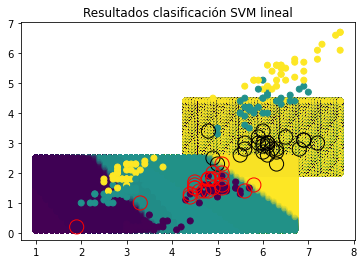

In [6]:
import matplotlib.pyplot as plt 
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x1 = np.linspace(np.min(X_train['sepal length (cm)']), np.max(X_train['sepal length (cm)']), 50)
x2 = np.linspace(np.min(X_train['petal length (cm)']), np.max(X_train['petal length (cm)']), 50)
y1 = np.linspace(np.min(X_train['sepal width (cm)']), np.max(X_train['sepal width (cm)']), 50)
y2 = np.linspace(np.min(X_train['petal width (cm)']), np.max(X_train['petal width (cm)']), 50)

Y1, X1, Y2, X2 = np.meshgrid(y1, x1, y2, x2)
grid = np.vstack([X1.ravel(), Y1.ravel(), X2.ravel(), Y2.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(grid[:,2], grid[:,3], c=pred_grid, alpha = 0.2)
ax.scatter(X_train['sepal length (cm)'], X_train['petal length (cm)'], c=y_train, alpha = 1)
ax.scatter(X_train['sepal width (cm)'], X_train['petal width (cm)'], c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)
ax.scatter(
    modelo.support_vectors_[:, 2],
    modelo.support_vectors_[:, 3],
    s=200, linewidth=1,
    facecolors='none', edgecolors='red'
)

# Hiperplano de separación
# ax.contour(
#     X1,
#     Y1,
#     modelo.decision_function(grid).reshape(X1.shape),
#    colors = 'k',
#     levels = [-1, 0, 1],
#     alpha  = 0.5,
#     linestyles = ['--', '-', '--']
# )
# 
# ax.contour(
#    X2,
#     Y2,
#     modelo.decision_function(grid).reshape(X2.shape),
#     colors = 'k',
#     levels = [-1, 0, 1],
#     alpha  = 0.5,
#     linestyles = ['--', '-', '--']
# )

ax.set_title("Resultados clasificación SVM lineal");

In [7]:
# Predicciones test
# ==============================================================================

predicciones = modelo.predict(X_test)
predicciones

array([1., 2., 0., 0., 2., 2., 2., 0., 0., 1., 0., 2., 0., 2., 1., 0., 1.,
       0., 1., 2., 2., 1., 0., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2.,
       0., 0., 1., 2., 1., 0., 0., 1., 2., 0., 2., 0., 0., 0., 2., 2.])

In [8]:
# Accuracy de test del modelo 
# ==============================================================================
from sklearn.metrics import accuracy_score
accuracy = accuracy_score (y_true = y_test, y_pred = predicciones, normalize = True )

print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 96.0%
